- Passengerid : 탑승자 번호
- survived : 생존 여부 0 : 사망 / 1 : 생존
- pclass : 티켓의 선실 등급
- sex : 성별
- name
- Age
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C  = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir('../data/titanic')

['gender_submission.csv', 'test.csv', 'train.csv']

In [9]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# EDA

In [11]:
#나이는 평균으로
titanic['Age'].fillna(titanic.Age.mean(), inplace = True)
titanic['Cabin'].fillna('N', inplace = True)
titanic['Embarked'].fillna('N', inplace = True)

print('데이터 Null 개수 : ', titanic.isnull().sum().sum())

데이터 Null 개수 :  0


In [12]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic.Cabin.value_counts().head()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
Name: Cabin, dtype: int64

In [14]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

## Cabin

In [17]:
#Cabin의 앞글자는 선실등급
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

## Sex

In [18]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
import warnings
warnings.filterwarnings("ignore")

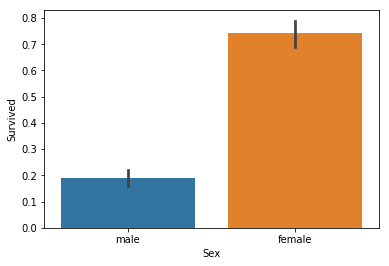

In [22]:
sns.barplot(x = titanic.Sex, y = titanic.Survived)

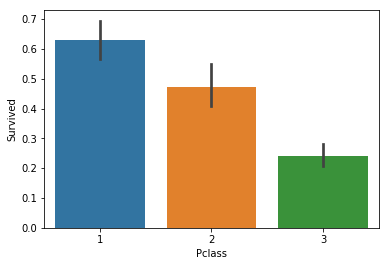

In [24]:
sns.barplot(x = 'Pclass', y = 'Survived',  data = titanic)

- 여성의 경우 1,2등급간 생존확률이 크지 않으나, 3등급이 현저히 적은 것을 알 수 있다.
- 남성의 경우는 1등급의 생존확률이 2,3등급보다 훨씬 높다.

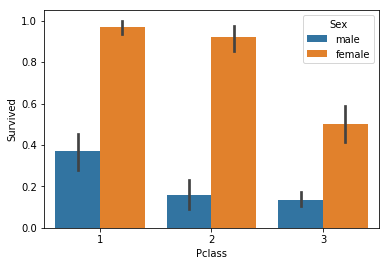

In [26]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic)

## age

In [27]:
def get_category(age) :
    
    cat = ''
    if age<=-1 : cat = 'Unknown'
    elif age <=5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

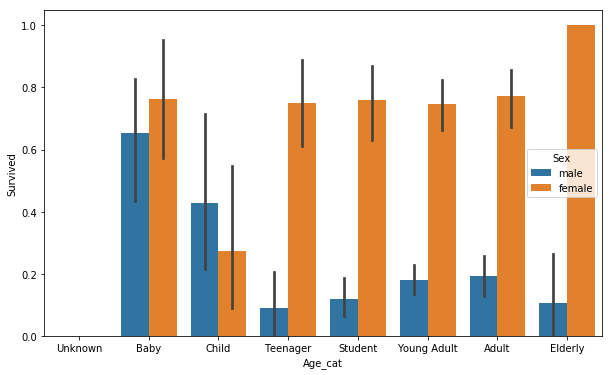

In [29]:
plt.figure(figsize = (10,6))

group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic['Age_cat'] = titanic['Age'].apply(lambda x : get_category(x))

sns.barplot(x = 'Age_cat', y = 'Survived', hue='Sex', data = titanic, order = group_names)

# Preprocessing

In [30]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
#Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df.Age.mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

# 불필요한 속성 제거
def drop_features(df) :
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    
    return df

# label encoding
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 위에서 설정한 전처리 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [35]:
Y_titanic = titanic['Survived']

X_titanic = titanic.drop('Survived', axis = 1)
X_titanic = transform_features(X_titanic)

# train_test_split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, Y_titanic, test_size = 0.2, random_state = 11)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=11)
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression()

In [38]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("DecisionTreeClassifier 정확도 : ", accuracy_score(y_test, dt_pred))

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RandomForestClassifier 정확도 : ", accuracy_score(y_test, rf_pred))

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LogisticRegression 정확도 : ", accuracy_score(y_test, lr_pred))

DecisionTreeClassifier 정확도 :  0.7877094972067039
RandomForestClassifier 정확도 :  0.8324022346368715
LogisticRegression 정확도 :  0.8659217877094972


# CV

In [39]:
from sklearn.model_selection import KFold

## kfold

In [62]:
def exec_kfold(clf, folds = 5) :
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic)) :
        
        X_train, X_test = X_titanic.values[train_index], X_titanic.values[test_index]
        y_train, y_test = Y_titanic.values[train_index], Y_titanic.values[test_index]
        
        rf.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, rf.predict(X_test))
        scores.append(accuracy)

        
        print('CV {} rf accuracy : {:.4f}'.format(iter_count,accuracy))
        
    #Kfold 평균
    mean_score = np.mean(scores)
    print('\n')
    print('평균 accuracy : {:.4f}'.format(mean_score))

In [63]:
exec_kfold(dt, folds = 5)

CV 0 rf accuracy : 0.7989
CV 1 rf accuracy : 0.7640
CV 2 rf accuracy : 0.8202
CV 3 rf accuracy : 0.7921
CV 4 rf accuracy : 0.8315


평균 accuracy : 0.8013


## cross_val_score
- StratifiedKFold

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_titanic, Y_titanic, cv = 5)
for iter_count, accuracy in enumerate(scores) :
    print('cv {0} accuracy : {1:.4f}'.format(iter_count, accuracy))
    
print('average accuracy : ', np.mean(scores))

cv 0 accuracy : 0.7430
cv 1 accuracy : 0.7765
cv 2 accuracy : 0.7809
cv 3 accuracy : 0.7753
cv 4 accuracy : 0.8418
average accuracy :  0.7835081515022234


## GridSearchCV

In [69]:
from sklearn.model_selection import  GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
            'min_samples_split' : [2,3,5], 'min_samples_leaf' : [1,5,8]}

In [70]:
grid_dt = GridSearchCV(dt, param_grid=parameters, scoring = 'accuracy', cv = 5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [71]:
print('GridSearchCV 최적 hyperparameter : ', grid_dt.best_params_)
print('GridSearchCV best accuracy : ', grid_dt.best_score_)
best_dc = grid_dt.best_estimator_

best_pred = best_dc.predict(X_test)
accuracy = accuracy_score(y_test, best_pred)
print('Test Set DecisionTreeClassifier best accuracy : ', accuracy)

GridSearchCV 최적 hyperparameter :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV best accuracy :  0.7991573033707865
Test Set DecisionTreeClassifier best accuracy :  0.8715083798882681
